# Cryptocurrency Analysis with Python: A Beginner's Guide to the Simple Moving Average (SMA) Crossover Strategy (part 3)
Find more tutorials about Computer Vision, Microscopy, Biology and Data Science [here](https://medium.com/@microbioscopicdata)

<p style="text-align: justify;">Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In the first 2 parts of this tutorial, we covered crucial concepts such as logarithmic returns, Maximum Drawdown (MDD), and simple moving averages. We also dived into the exciting world of the SMA Crossover Strategy, implementing and backtesting it to explore whether it can outperform the Buy and Hold Strategy. In this final part, we will wrap up all our knowledge into a function, allowing for easier optimization. 
        Optimization is a critical step that involves exploring different parameter combinations to find the most effective settings for our SMA Crossover Strategy. By fine-tuning our approach, we aim to enhance its performance and increase the likelihood of success in real-world market conditions. At the end, we will conduct forward testing to ensure the robustness of our optimized strategy.</div>
    
<p style="text-align: justify;">Disclaimer: I am not a trader and this blog post is not financial advice. This is purely introductory knowledge. Past results are not always predictive of future results. All investment-related queries should be directed to your financial advisor.</div>

##  Wrap up all our knowledge into a function

- In the code below we wrap up all our knowledge into a function named `sma_startegy`. Briefly, the function takes the start_date, end_date, and `parameters` (a tuple containing cryptocurrency, short-term and long-term SMAs) as input parameters.  



- <p style="text-align: justify;">The function then downloads historical price data for the specified cryptocurrency symbol within the given date range using the yfinance library. It calculates simple returns, log-returns, and creates columns for short-term and long-term moving averages (SMA).</div>  




- <p style="text-align: justify;">Next, it determines the trading positions based on the crossover strategy (1 for buy and 0 for neutral) and calculates trading costs.</div>  




- <p style="text-align: justify;">The function returns a tuple with the last values of Cumulative Strategy Returns net and Cumulative Buy and Hold returns. This will help us compare the final performance of the SMA crossover strategy with the Buy and Hold strategy for our cryptocurency (Ethereum).</div>

In [2]:
def sma_startegy(start_date,end_date,parameters):
# Import Libraries
    import yfinance as yf
    import mplfinance as mpf
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

# Cryptocurrency symbol and the date range
    symbol = parameters[0]  
    start_date = start_date
    end_date = end_date

# Retrieve the historical price data for the specified cryptocurrency symbols
    data = yf.download(symbol, start=start_date, end=end_date)
    df = data["Close"].to_frame() #Extracts only the "Close" column
    df.rename(columns={"Close":"Price"}, inplace=True) # Rename column

# Calculate Log-Returns
    df["Log-Returns"]= np.log(df["Price"].div(df["Price"].shift()))#
    
# Create short-term and long-term moving average columns
    df["Short SMA"] = df["Price"].rolling(parameters[1]).mean()
    df["Long SMA"]= df["Price"].rolling(parameters[2]).mean()

# Drop rows with missing values (NaN) 
    df.dropna(inplace=True)

# Calculate Positions based on SMA Crossover Strategy
# If the short-term moving average is greater than the long-term moving average,
# set the Position to 1 (buy signal). Otherwise, set the Position to 0 (neutral).
    df['Positions'] = np.where(df["Short SMA"] > df["Long SMA"], 1, 0)

# Calculate Trades based on the change in Positions
# The Trades column represents the difference between consecutive Position values,
# which indicates when a trade was executed (buy or sell).
# If the Position changes from 0 to 1 or from 1 to 0, a trade was executed.
    df["Trades"] = df["Positions"].diff().fillna(0).abs()

# Set the values for trading costs and calculate the total costs associated with each trade
    commissions = 0.00075
    spread_slippage = 0.0001
    Costs = np.log(1 - commissions) + np.log(1 - spread_slippage)

# Calculate Returns for the SMA Crossover Strategy
    df["Strategy Returns"] = df["Positions"].shift(1) * df["Log-Returns"]

# Calculate Net Strategy Returns after accounting for trading costs
    df["Strategy Returns Net"] = df["Strategy Returns"] + df["Trades"] * Costs
# Drop rows with missing values (NaN) resulted from calculating Strategy Returns
    df.dropna(inplace=True)
    
# Calculate the cumulative returns (normalized with base of 1) 
    df["Cumulative Returns"] = df["Log-Returns"].cumsum().apply(np.exp)
    df["Cumulative startegy Returns"] = df["Strategy Returns"].cumsum().apply(np.exp)
    df["Cumulative startegy Returns Net"] = df["Strategy Returns Net"].cumsum().apply(np.exp)
    
# The function returns a tuple with the last values of Cumulative Strategy Returns net and Cumulative Buy and Hold Returns
    return (df["Cumulative startegy Returns Net"][-1],df["Cumulative Returns"][-1])    


The `sma_strategy` function is a simple implementation of the SMA Crossover Strategy, but it could benefit from additional parameters and enhancements to improve its robustness and efficiency. Possible improvements and additions to the function could include:

- Parameter Flexibility: : Allow the function to accept additional parameters to customize the strategy, such as different cryptocurrencies, and the option to include or exclude trading costs.

- Error Handling: Implement error handling to handle various issues that might occur during the function's execution, such as invalid input data or connection errors when downloading historical prices.

- Visualization: Add an optional parameter to control whether to plot the Cumulative Returns for visual analysis.

- Output Format: Return the results in a more structured and informative format, such as a dictionary or a DataFrame, to make it easier to interpret the strategy's performance.

...and much more!

## Use the function
To use the `sma_strategy` function, we can call it with appropriate values for start_date, end_date, and SMAs, and it will return the final Cumulative Returns for the SMA crossover strategy and the Buy and Hold strategy (see code below).

In [3]:
# Set for Ethereum a short-term SMA period of 50 and long-term SMA period of 200
parameters = ("ETH-USD", 50, 200)
sma_startegy("2018-01-01", "2023-07-30", parameters)

[*********************100%***********************]  1 of 1 completed


(8.162117479377091, 3.9147095827683653)

The result of the above function is a tuple containing two values: (8.162117479377091, 4.005521274850177).

The first value of the tuple, 8.162117479377091, represents the Cumulative Net Returns of the SMA Crossover Strategy. This means that if we had implemented the SMA Crossover Strategy on Ethereum from the specified start date (`2018-01-01`) to the end date (`2023-07-30`), our investment would have grown by approximately 8.16 times (716.21%).

The second value of the tuple, 4.005521274850177, represents the cumulative Returns of the Buy and Hold Strategy. This means that if we had simply bought and held Ethereum for the same period, our investment would have grown by approximately 4.01 times (301.55%).

<p style="text-align: justify;">Comparing the two values, we can see that the <b>SMA Crossover Strategy has outperformed the Buy and Hold Strategy</b> in terms of cumulative returns, being more profitable during the specified period. <b>Although, keep in mind that past performance does not guarantee future results, and cryptocurrency investments can be highly volatile.</div></b>

## Strategy Optimization
<p style="text-align: justify;">Many traders search for the  most efficient way to maximize net profit or expense reduction [1]. Strategy Optimization entails entering a range for the specified input and letting the computer "do the calculations" to figure out what input would have performed the best. In the <b>code above</b>, we have tested our SMA Crossover Strategy using 2 arbitrary values of Simple Moving Averages (50 for the short-term and 200 for the long-term SMA). Our Strategy could perform better for different combinations of Simple Moving Averages. The code below  aims to find the optimal combinations of short-term and long-term Simple Moving Averages (SMAs) for Ethereum  SMA Crossover Strategy.</div>


The `range` method creates a range of short-term and long-term SMA values. The code `combinations = list(product(range_Short,range_long,cryptocurrencies))` creates a list of tuples containing all possible combinations of short-term and  long-term  SMA values.


In [4]:
# !pip install more-itertools 

# Create a range of short-term and Long-term SMA values 
range_Short = range(5,145,5) #starts from 5, increments by 5, and ends at 145 (exclusive)
range_long = range(150,250,5)#starts from 150, increments by 5, and ends at 250 (exclusive)
cryptocurrencies = ['ETH-USD']  

# The itertools.product function allows us to compute the set of all possible combinations
from itertools import product
# Create a list of tuples containing all possible combinations of short-term and long-term SMA value
combinations = list(product(cryptocurrencies,range_Short,range_long))

# Print the length/number of all possible combinations
print(len(combinations))

560


In [5]:
# Initialize an empty list named results
results=[]

#  Iterate through each combination in the combinations list created above
for comb in combinations:
    results.append(sma_startegy( "2018-01-01", "2021-07-30", comb))#append the results to the result list
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<p style="text-align: justify;">The code below aims to identify the top five parameter combinations (for Short-term and Long-term SMA)  that maximaze the "Strategy Returns" compared to the "Buy and Hold Strategy." More precisly, for Ethereum the best parameter combination is to use "Short-term SMA" of 105 and "Long-term SMA" of 185 (see below). </div>

In [7]:
import pandas as pd
# Create a DataFrame
df_results = pd.DataFrame(data=combinations, columns=["Crypto", "Short SMA", "Long SMA"])
# Create a new column "Performance" containing the results obtained from the sma_startegy function
df_results["Performance"] = results

# Split the "Performance" column into two separate columns, "Strategy Returns" and "Buy and Hold Strategy," 
df_results[['Strategy Returns','Buy and Hold Strategy']] = df_results['Performance'].apply(pd.Series)

# Create a new column "OutPerformance" by subtracting "Buy and Hold Strategy" from "Strategy Returns"
df_results["OutPerformance"]=df_results['Strategy Returns']-df_results['Buy and Hold Strategy']

# Drop/delete the "Performance" column
df_results.drop("Performance", axis=1, inplace=True)
grouped_df = df_results.groupby(by="Crypto")[["Short SMA", "Long SMA","Strategy Returns",'Buy and Hold Strategy','OutPerformance']]

# Find the five largest values based on "Strategy Returns
grouped_df.apply(lambda x: x.nlargest(5, 'Strategy Returns'))

Short SMA  Long SMA  Strategy Returns  Buy and Hold Strategy  \
Crypto                                                                      
ETH-USD 407        105       185         23.725398               5.129217   
        423        110       165         21.785389               4.986360   
        425        110       175         21.315860               5.017611   
        427        110       185         21.134374               5.129217   
        406        105       180         21.043573               5.637202   

             OutPerformance  
Crypto                       
ETH-USD 407       18.596182  
        423       16.799029  
        425       16.298249  
        427       16.005157  
        406       15.406371

<p style="text-align: justify;">Furthermore, we can analyze each parameter separately and assess its impact on the Strategy Returns. To visualize how the Strategy Returns vary with different Short and Long SMA values, the code below groups the data based on the "Short SMA" and "Long SMA" columns, calculates the average "Strategy Returns," and then plots the average Strategy Returns against the Short/Long SMA values.</div>  
    
<p style="text-align: justify;"><b>It is essential to be cautious</b> because after the Short SMA value of 105, there is a rapid drop in Strategy Returns. This observation suggests that choosing the right Short SMA (and Long SMA) value is crucial to achieve better performance in the SMA Crossover Strategy. Experimenting with various parameter values and performing sensitivity analysis can help fine-tune the strategy and optimize Returns. </div>


Text(0, 0.5, 'Strategy Returns')

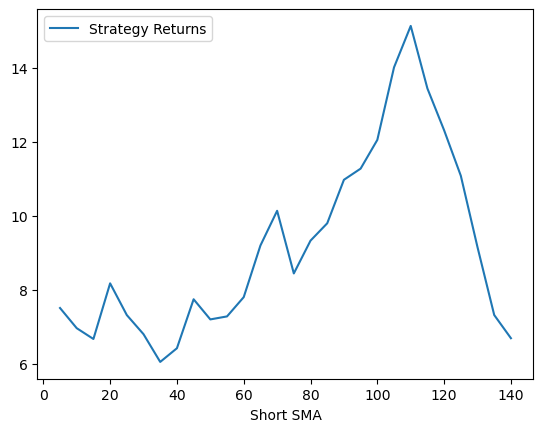

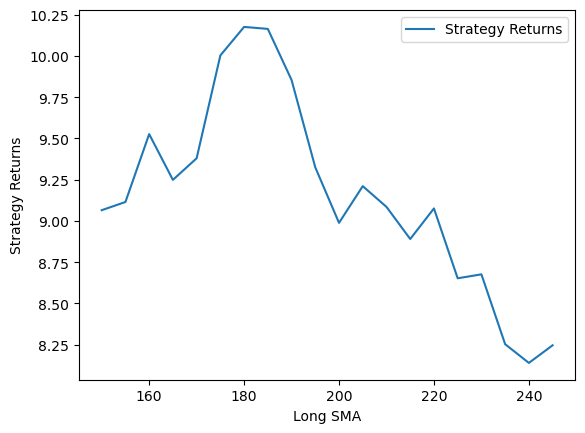

In [8]:
# Group the data and calculate the mean of "Strategy Returns" for each "Short SMA"
ax=grouped_df_short = df_results.groupby(by="Short SMA")[["Strategy Returns"]].mean().plot()

ax=grouped_df_short = df_results.groupby(by="Long SMA")[["Strategy Returns"]].mean().plot()

# Add y-axis title
ax.set_ylabel("Strategy Returns")

## Forward Testing
<p style="text-align: justify;">All right, we have seen that we get pretty good backtesting results, for our Simple Moving Average (SMA) Crossover Strategy.</div>
    
**Is this information enough to make profits in the future?**

<p style="text-align: justify;">Finding the best SMA combinations (that returns the best performance) by exploring a large number of values can cause overfitting/overoptimization,  an undesirable behavior where the strategy appears to perform exceptionally well on historical data but may not generalize well to new, unseen data.</div>

<p style="text-align: justify;">Forward testing is a technique used to assess the effectiveness of a trading strategy by applying it to data that the strategy has not encountered previously. Unlike backtesting, where the strategy is tested on historical data, forward testing simulates the strategy's performance under real-world market conditions or simply unseen data. </div>

<b>How do you execute forward testing? </b>

There are several ways to conduct forward testing, including: 

- **Paper trading:** This involves simulating trades using real-time market data, but without actually placing any trades. This allows traders to observe how their strategy would have performed in real-time market conditions without risking any capital. **Needs to much time**  

- **Live trading:** This involves actually placing trades in the market using the strategy being tested. **Needs to much time**  



- **Split the historical data into 2 parts: the *training dataset* and *the testing dataset*. The training dataset contains historical data up to a certain date, and the testing dataset contains data from a later date onwards that the strategy has not seen during its development. Use the training dataset to backtest and fine-tune your trading strategy and then apply the Strategy it to the testing dataset (this is the forward testing phase) where the strategy is run on data it has never encountered before -- Time efficient!**

#### Back Testing [start date (2018-01-01) to the end date (2021-07-30)] and Optimization for Ethereum

In [9]:
# Create a range of short-term and Long-term SMA values 
range_Short = range(5,145,5)
range_long = range(150,250,5)
cryptocurrencies = ['ETH-USD']  

# Create a list of tuples containing all possible combinations of short-term and long-term SMA value
combinations = list(product(cryptocurrencies,range_Short,range_long))


# Initialize an empty list named results
results=[]

#  Iterate through each combination in the combinations list created above
for comb in combinations:
    results.append(sma_startegy( "2018-01-01", "2021-07-30", comb))#append the results to the result list
    
import pandas as pd
# Create a DataFrame
df_results = pd.DataFrame(data=combinations, columns=["Crypto", "Short SMA", "Long SMA"])
# Create a new column "Performance" containing the results obtained from the sma_startegy function
df_results["Performance"] = results

# Split the "Performance" column into two separate columns, "Strategy Returns" and "Buy and Hold Strategy," 
df_results[['Strategy Returns','Buy and Hold Strategy']] = df_results['Performance'].apply(pd.Series)

# Create a new column "OutPerformance" by subtracting "Buy and Hold Strategy" from "Strategy Returns"
df_results["OutPerformance"]=df_results['Strategy Returns']-df_results['Buy and Hold Strategy']

# Drop/delete the "Performance" column
df_results.drop("Performance", axis=1, inplace=True)
grouped_df = df_results.groupby(by="Crypto")[["Short SMA", "Long SMA","Strategy Returns",'Buy and Hold Strategy','OutPerformance']]

# Find the five largest values based on "Strategy Returns
grouped_df.apply(lambda x: x.nlargest(5, 'Strategy Returns'))
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Short SMA  Long SMA  Strategy Returns  Buy and Hold Strategy  \
Crypto                                                                      
ETH-USD 407        105       185         23.725398               5.129217   
        423        110       165         21.785389               4.986360   
        425        110       175         21.315860               5.017611   
        427        110       185         21.134374               5.129217   
        406        105       180         21.043573               5.637202   

             OutPerformance  
Crypto                       
ETH-USD 407       18.596182  
        423       16.799029  
        425       16.298249  
        427       16.005157  
        406       15.406371

 ### Forward Testing [start date (2021-07-30) to the end date (2023-07-30)]  for Ethereum
<p style="text-align: justify;">Now, let's move on with Forward testing, the code below returns calculates the Cumulative Net Strategy Returns and the Cumulative Returns for Ethereum during the forward testing period from "2021-07-30" to "2023-07-30" using the optimized values for  Short and Long SMAs found during back testing .</div>

In [10]:
parameters = ("ETH-USD", 50, 200)
sma_startegy("2021-07-30", "2023-07-30", parameters)

[*********************100%***********************]  1 of 1 completed


(1.2153541220152524, 0.652364396724114)

<p style="text-align: justify;">Comparing the two values above, we can see that the SMA Crossover Strategy has outperformed the Buy and Hold Strategy in terms of Cumulative Returns during the forward testing period ("2021-07-30" to "2023-07-30"), showing that the SMA Crossover Strategy was able to achieve higher returns compared to just holding the Ethereum over the same period. <b>It is important to remember that forward testing is not a guarantee of future performance. Even with successful forward testing results, real market conditions can still be unpredictable and subject to unforeseen events. Therefore, it is essential to use forward testing as one of many tools in your trading strategy development and risk management processes.</b>  
    
In addition to Cumulative Returns, we can incorporate other metrics to ensure the robustness and reliability of the strategy's outperformance. Some commonly used metrics for evaluating trading strategies include:
    
- Maximum Drawdown: Covered in the second part of this tutorial  
    
- Annualized Return: Covered in the second part of this tutorial

- Sharpe Ratio: This metric considers both the strategy's returns and its risk (volatility). A higher Sharpe Ratio indicates a more efficient risk-adjusted return.

- Sortino Ratio: Similar to the Sharpe Ratio, but it considers only the downside risk, focusing on negative volatility.
    
    and many more...

## Conclusions

<p style="text-align: justify;"> Throughout this tutorial series on Cryptocurrency Analysis with Python, we have delved into key concepts and strategies that are vital for navigating the dynamic cryptocurrency market. In Part 1, we laid the foundation by exploring logarithmic returns, Maximum Drawdown (MDD), and simple moving averages (SMA). These fundamental tools provided us with valuable insights to make well-informed decisions in the ever-changing cryptocurrency landscape.

In Part 2, we focused on the implementation of the Simple Moving Average (SMA) Crossover Strategy. By calculating the trading costs associated with the strategy, including commissions, spread, and slippage, we were able to assess its performance in comparison to the straight forward Buy and Hold Strategy. .

Finally, in this concluding part, we consolidated our knowledge by encapsulating the SMA Crossover Strategy into a function. This step facilitated easier optimization, enabling us to explore various parameter combinations to find the best possible settings for our strategy. Moreover, we emphasized the importance of forward testing, a critical method for validating the effectiveness and robustness of our strategy in real-world market conditions.</div>

**Remember that while past performance can offer insights, it does not guarantee future results. Always approach cryptocurrency trading with a well-defined strategy, discipline, and a deep understanding of the risks involved. Happy trading!!**

I have prepared a Jupyter Notebook to accompany this blog post, which can be viewed in my GitHub.

If you enjoy reading stories of this nature and wish to show your support for my writing, you may contemplate becoming a Medium member. By subscribing for just $5 per month, you’ll gain boundless entry to a vast collection of Python guides and Data science articles. Additionally, if you choose to sign up through my referral link, I’ll receive a modest commission with no extra cost to you.


## References:


[1]	“Definition of Financial Optimization - Gartner Finance Glossary.” https://www.gartner.com/en/finance/glossary/financial-optimization (accessed Aug. 01, 2023).  

[2]	“Backtesting and Forward Testing: The Importance of Correlation,” Investopedia. https://www.investopedia.com/articles/trading/10/backtesting-walkforward-important-correlation.asp (accessed Aug. 01, 2023).  

[3]	“(12) What is forward testing? | LinkedIn.” https://www.linkedin.com/pulse/what-forward-testing-hue-frame/ (accessed Aug. 02, 2023).

